<a href="https://colab.research.google.com/github/evmpython/2_codigos_gerais/blob/main/35_acesso_a_dados_via_opendap_no_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q "numpy<2.0" xarray dask netCDF4 bottleneck pydap

- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.


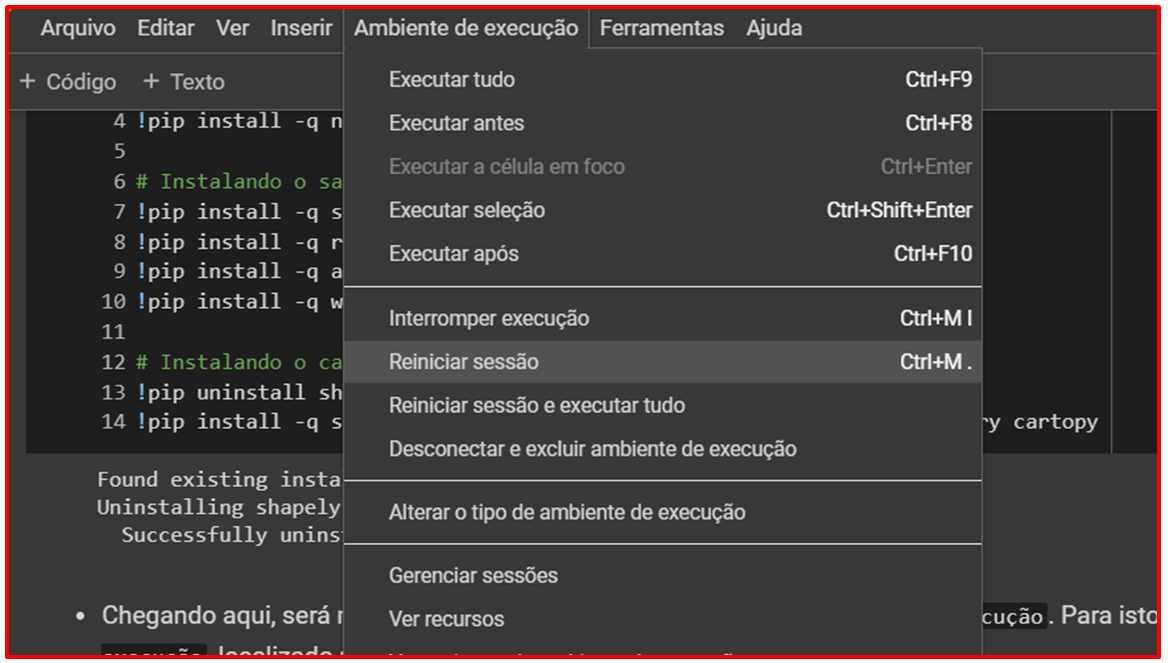

In [2]:
import xarray as xr

- Dados de NDVI: http://apdrc.soest.hawaii.edu/dods/public_data/satellite_product/MODIS_vegi/monthly_v6.1.info

In [3]:
ds = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/MODIS_vegi/monthly_v6.1')
ds

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:187: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)


<xarray.Dataset> Size: 123GB
Dimensions:  (time: 296, lat: 3600, lon: 7200)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-02-01 2000-03-01 ... 2024-09-01
  * lat      (lat) float64 29kB -90.0 -89.95 -89.9 -89.85 ... 89.85 89.9 89.95
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
Data variables:
    ndvi     (time, lat, lon) float32 31GB ...
    ndvi_sd  (time, lat, lon) float32 31GB ...
    evi      (time, lat, lon) float32 31GB ...
    evi_sd   (time, lat, lon) float32 31GB ...
Attributes:
    title:          MODIS Vegetation Indices (MOD13C2) Version 6.1
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/modis_vegi.php
    history:        Tue Nov 05 13:38:38 HST 2024 : imported by GrADS Data Ser...

In [4]:
# Limites do Brasil
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

# recorta para um quadrado e no tempo
ds_brasil = ds.sel(lon=slice(lonmin, lonmax), lat=slice(latmin, latmax))

# mostra os dados
ds_brasil

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 296, lat: 841, lon: 841)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-02-01 2000-03-01 ... 2024-09-01
  * lat      (lat) float64 7kB -35.0 -34.95 -34.9 -34.85 ... 6.85 6.9 6.95 7.0
  * lon      (lon) float64 7kB -75.0 -74.95 -74.9 -74.85 ... -33.1 -33.05 -33.0
Data variables:
    ndvi     (time, lat, lon) float32 837MB ...
    ndvi_sd  (time, lat, lon) float32 837MB ...
    evi      (time, lat, lon) float32 837MB ...
    evi_sd   (time, lat, lon) float32 837MB ...
Attributes:
    title:          MODIS Vegetation Indices (MOD13C2) Version 6.1
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/modis_vegi.php
    history:        Tue Nov 05 13:38:38 HST 2024 : imported by GrADS Data Ser...

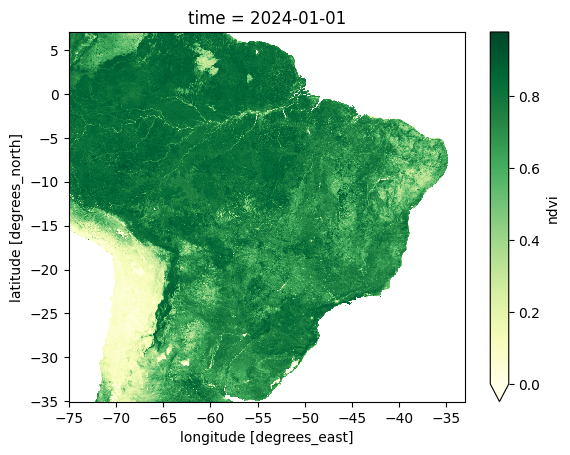

In [5]:
(ds_brasil['ndvi'].sel(time=slice('2024-01-01', '2024-01-01'))[0,:,:]/10000).plot(cmap='YlGn', vmin=0)

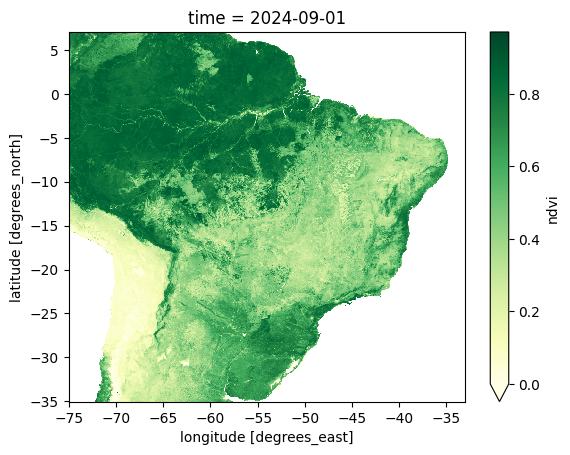

In [6]:
(ds_brasil['ndvi'].sel(time=slice('2024-09-01', '2024-09-01'))[0,:,:]/10000).plot(cmap='YlGn', vmin=0)